In [ ]:
#credit card applications - machine learning

In [ ]:
#the general flow of this code
#1. load & view the dataset
#2. analyze (numeric & non-numeric values) and missing values
#3. data preprocessing
#4. build machine learning model to predict if someone's application for cc will be accepted or not

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from pylab import rcParams
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
#load data
df = pd.read_csv("cc_approval.csv", header=None)

#view data
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+\
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+\
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+\
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+\
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+\


In [3]:
#count the values of (+) and (-)
#represent the approval
df[15].value_counts()

-\    383
+\    307
Name: 15, dtype: int64

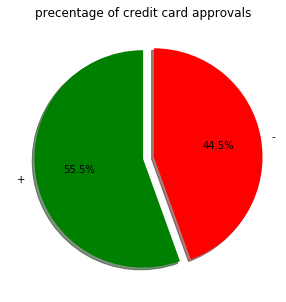

In [11]:
#visualize using diagram
data_size = df[15].value_counts(sort=True)
colors = ["green", "red"]
rcParams["figure.figsize"] = 5,5

#plotting
labels = "+", "-"
explode = (0, 0.1)
plt.pie(data_size, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("precentage of credit card approvals")
plt.show()


In [15]:
#describe the dataset
df.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [16]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [26]:
#view original dataset
print("original", df.tail(20))

#replace missing values
df = df.replace("?", np.nan)

original       0      1       2  3  4   5   6      7  8  9     10 11 12     13     14  \
670    b  47.17   5.835  u  g   w   v  5.500  f  f   NaN  f  g  00465  150.0   
671    b  25.83  12.835  u  g  cc   v  0.500  f  f   NaN  f  g  00000    2.0   
672    a  50.25   0.835  u  g  aa   v  0.500  f  f   NaN  t  g  00240  117.0   
673  NaN  29.50   2.000  y  p   e   h  2.000  f  f   NaN  f  g  00256   17.0   
674    a  37.33   2.500  u  g   i   h  0.210  f  f   NaN  f  g  00260  246.0   
675    a  41.58   1.040  u  g  aa   v  0.665  f  f   NaN  f  g  00240  237.0   
676    a  30.58  10.665  u  g   q   h  0.085  f  t  12.0  t  g  00129    3.0   
677    b  19.42   7.250  u  g   m   v  0.040  f  t   1.0  f  g  00100    1.0   
678    a  17.92  10.210  u  g  ff  ff    NaN  f  f   NaN  f  g  00000   50.0   
679    a  20.08   1.250  u  g   c   v    NaN  f  f   NaN  f  g  00000    NaN   
680    b  19.50   0.290  u  g   k   v  0.290  f  f   NaN  f  g  00280  364.0   
681    b  27.83   1.000  y  p  

In [42]:
#handling missing values
for col in df:
    #check if the column is of object type
    if df[col].dtypes == "object":
        #fill with the most frequent value
        df = df.fillna(df[col].value_counts().index[0])

#count the nan values of every columns in dataset
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [51]:
df = df.apply(LabelEncoder().fit_transform)
df.head()


TypeError: ('argument must be a string or number', 'occurred at index 2')